# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
csv1 = pd.read_csv('../raw_data/csv1.csv')
csv2 = pd.read_csv('../raw_data/csv2.csv')
csv3 = pd.read_csv('../raw_data/csv3.csv')
csv4 = pd.read_csv('../raw_data/csv4.csv')
csv5 = pd.read_csv('../raw_data/csv5.csv')
csv6 = pd.read_csv('../raw_data/csv6.csv')



In [4]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)


In [5]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')

csv_full

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_12286/3997445115.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ContinentCode_x', 'Year_x', 'Code_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_12286/3997445115.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ContinentCode_x', 'Year_x', 'Code_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,Afghanistan,AFG,AS,1960.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962.0,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
csv_full.isna().sum()

Country_x                                                   3796
Code_x                                                      3796
ContinentCode_x                                             4716
Year_x                                                      3796
Military spending percent of total government spending      8431
                                                            ... 
State legitimacy index 0 (high) - 10 (low)                  9751
Human rights and rule of law index 0 (high) - 10 (low)      9750
Demographic pressures 0 (low) - 10 (high)                   9750
Refugees and displaced persons index 0 (low) - 10 (high)    9750
External interventions index 0 (low) - 10 (high)            9750
Length: 114, dtype: int64

In [7]:
conflicts = pd.read_csv('../raw_data/conflict_data/conflict_data_1970.csv')

In [8]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [9]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [10]:
def get_code(row):
    
    code_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [11]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [12]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

# DELETING TINY PROVINCES/STATES

In [13]:
tiny_countries = ['Andorra','Antigua and Barbuda','Aruba','Belize','Bhutan','Brunei','Cape Verde','Comoros','Dominica','Kiribati',
                 'Micronesia','Montserrat','Palau','Saint Vincent and the Grenadines','Sao Tome and Principe','Solomon Islands','Taiwan',
                  'Tuvalu','Vanuatu','Euro area','Faroe Islands','Gibraltar','Macao','New Caledonia','San Marino','Norfolk Island','Holy See (Vatican City)']
csv_full = csv_full.set_index('country_all').drop(tiny_countries)
csv_full.reset_index(inplace=True)
csv_full[csv_full['country_all']=='Syria']




,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all
7293,Syria,Syria,SYR,AS,1960.0,NaN,37.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960
7294,Syria,Syria,SYR,AS,1961.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961
7295,Syria,Syria,SYR,AS,1962.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1962
7296,Syria,Syria,SYR,AS,1963.0,NaN,74.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1963
7297,Syria,Syria,SYR,AS,1964.0,NaN,50.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7351,Syria,Syria,SYR,AS,2018.0,NaN,181.0,NaN,NaN,NaN,...,9.9,9.9,8.5,7.8,9.9,9.9,8.2,10.0,10.0,2018
7352,Syria,Syria,SYR,AS,2019.0,NaN,NaN,NaN,NaN,NaN,...,9.9,10.0,8.8,7.5,9.9,10.0,7.9,10.0,10.0,2019
7353,Syria,Syria,SYR,AS,2020.0,NaN,72.0,NaN,NaN,NaN,...,9.9,10.0,8.7,7.2,10.0,10.0,7.6,10.0,10.0,2020
9901,Syria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.9,9.7,9.6,7.1,10.0,9.7,7.6,9.7,10.0,2021


In [14]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [15]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [16]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_12286/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [17]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [18]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [19]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id


In [20]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [21]:
final_df.shape

(470, 117)

In [22]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Dropping features

In [23]:
final_df.shape

(470, 117)

In [24]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [25]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [26]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [27]:
final_df['CountryYear']

6348        Rwanda1985
6349        Rwanda1986
6350        Rwanda1988
9657        Rwanda1987
9658        Rwanda1989
             ...      
3938    Kazakhstan2017
3939    Kazakhstan2018
3940    Kazakhstan2019
3941    Kazakhstan2020
3942    Kazakhstan2021
Name: CountryYear, Length: 470, dtype: object

# Dropping data for the imputer

In [28]:
bin_list = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population']
final_df.head()

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0


In [29]:
cleaner_df = final_df.drop(columns=bin_list)

In [30]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [31]:
cleaner_df

,country_all,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,NaN,3.0,NaN,Rwanda1985,4.40,279.10,NaN,17.31,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,NaN,2.0,NaN,Rwanda1986,5.47,301.80,NaN,15.87,-1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,NaN,2.0,NaN,Rwanda1988,4.50,337.96,NaN,14.49,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,Rwanda1987,-0.02,318.21,NaN,15.66,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,Rwanda1989,-0.04,330.50,NaN,13.43,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,3.45,214.0,0.813,Kazakhstan2017,4.10,9247.58,24862.97,26.35,7.4,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,4.65,310.0,0.817,Kazakhstan2018,4.10,9812.63,25544.35,25.26,6.0,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,5.25,312.0,0.817,Kazakhstan2019,4.50,9812.60,26351.80,27.63,5.2,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,4.56,268.0,0.825,Kazakhstan2020,-2.50,9121.64,25361.51,28.52,6.7,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Grouping the data


In [32]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_12286/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [33]:
grouped_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'GDP per capita Purchasing Power Parity',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'External debt percent of Gross National Income',
       'Government spending as percent of GDP',
       'Fiscal balance percent of GDP', 'Government debt as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Govern

# Create the control dataset

In [34]:
conflict_years = final_df['CountryYear']

In [35]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [36]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [37]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270,random_state=16)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

    

In [38]:
id_list = list(range(95,365))*5

In [39]:
id_list = sorted(id_list)

In [40]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Gambia', 'North Korea', 'Bolivia', 'Colombia', 'Cyprus',
       'South Korea', 'Cuba', 'Cameroon', 'Mozambique',
       'Democratic Republic of the Congo', 'Bulgaria', 'Togo', 'Bahrain',
       'Spain', 'Bahamas', 'Liberia', 'Niger', 'Nicaragua', 'Ukraine',
       'Ecuador', 'Brazil', 'Iraq', 'Lebanon', 'Libya', 'Portugal',
       'Saint Lucia', 'Australia', 'Lithuania', 'Trinidad and Tobago',
       'Gabon', 'Canada', 'Sweden', 'Russia', 'Kenya', 'Morocco',
       'Paraguay', 'Barbados', 'Burundi', 'Estonia', 'Djibouti',
       'Saudi Arabia', 'Poland', 'Madagascar', 'Papua New Guinea',
       'Ivory Coast', 'Germany', 'Venezuela', 'Indonesia', 'Uruguay',
       'Israel', 'Jamaica', 'Moldova', 'France', 'Pakistan', 'Angola',
       'Monaco', 'Tajikistan', 'Greece', 'Fiji', 'Nepal', 'Czechia',
       'Senegal', 'Bermuda', 'Egypt', 'Peru', 'Zambia', 'Seychelles',
       'Georgia', 'Uganda', 'El Salvador', 'Sierra Leone', 'Grenada',
       'Thailand', 'Bosnia and Herzegovina', 'B

In [41]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_12286/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [42]:
columns_to_keep = list(grouped_df.columns)

In [43]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,,,,,,,
95,4.886667,NaN,0.4568,3.328,674.282,2073.014,21.152,6.88,9.486,13.270,...,6.02,7.18,3.62,8.10,6.94,8.06,8.82,8.20,6.54,7.12
96,NaN,48.60,NaN,NaN,NaN,NaN,NaN,NaN,2.870,6.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,4.100000,20.25,0.6916,4.600,3218.844,8199.364,21.038,3.72,3.160,6.368,...,6.48,8.06,6.24,5.44,8.58,6.80,6.02,6.46,3.96,5.96
98,9.455000,68.80,0.6015,3.824,1303.688,8308.090,20.338,27.34,10.120,19.220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,4.030000,26.00,0.8710,3.658,27487.312,39060.734,19.394,0.04,9.406,20.920,...,4.16,7.90,5.98,5.72,5.58,4.48,2.98,3.36,5.12,8.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.867500,122.00,0.7695,0.148,9456.630,19149.618,21.228,4.72,3.802,7.390,...,8.60,5.40,6.66,4.66,5.54,5.94,6.08,5.86,4.92,5.08
361,2.062000,75.60,0.9020,0.744,45865.954,47965.334,23.888,2.58,7.572,20.148,...,1.88,3.50,4.50,3.32,4.54,2.40,1.62,2.74,1.82,2.54
362,8.880000,37.40,0.6602,2.908,2079.734,8563.428,20.208,30.06,4.550,9.696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


full_dataset = pd.concat([grouped_df,sample_full_clean])



In [46]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,11.711361,2.333333,0.310250,2.862,313.514,-3113.326979,15.352,1.760000,7.885139,12.569530,...,8.915642,8.027487,9.117866,8.549174,8.699885,8.665475,10.110873,8.471799,9.697956,1.0
1,10.913614,16.000000,0.366524,3.200,823.864,-2180.413483,13.258,2.740000,6.960334,12.167396,...,7.162734,7.364089,8.277610,8.507728,6.731289,6.902513,9.221272,7.291073,8.567499,1.0
2,10.390000,122.200000,0.311946,3.308,257.922,-4950.476799,15.868,7.766667,4.780591,7.847159,...,8.478230,8.820492,8.949660,9.106733,7.539875,7.834912,10.285854,8.828724,9.764883,1.0
3,11.770459,2.000000,0.306317,4.888,174.638,-5466.963618,21.562,11.140000,5.735612,8.991692,...,8.588668,8.555304,9.279893,8.631784,7.768207,7.790493,9.942824,8.267035,9.581755,1.0
4,7.630864,-49.671048,0.639740,-4.666,1614.640,11135.460000,29.614,73.109151,7.112838,14.253309,...,5.099703,5.815276,6.272184,7.773516,6.676481,5.447787,6.980305,4.762893,5.560299,1.0


In [47]:
#  data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

In [48]:
# imputed_control_df

In [49]:
# separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
# separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
# separate_impute_full_df
# imputed_final_df

In [50]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [51]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [52]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [53]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,9.295469,174.773705,0.623028,3.484860,8405.013557,14924.102030,22.983565,95.715686,8.123914,16.763247,...,6.239465,6.368779,6.620870,7.130639,6.892109,6.475459,6.830280,5.277496,6.090180,0.258242
std,6.482251,389.148584,0.178475,3.014434,13877.602240,17152.080972,7.024888,563.077516,5.185459,10.838094,...,3.530345,2.103922,3.681038,1.595493,2.090542,2.120597,2.076879,3.369005,3.468624,0.438270
min,-0.431881,-1334.549186,0.092303,-12.550000,123.432000,-13530.430376,0.000000,-396.270065,0.580000,0.870000,...,-24.456843,-3.329628,0.273687,1.600000,0.760000,1.180000,-1.663534,-24.502581,-23.244829,0.000000
25%,4.372500,8.187500,0.489750,2.052500,823.203000,3872.108500,19.198000,2.620000,4.308500,8.899500,...,4.980000,5.086270,5.045000,6.126755,6.060000,5.023062,5.573773,3.873162,4.717549,0.000000
50%,7.870105,50.210942,0.654500,3.478792,3110.693000,9584.088000,22.556000,5.920000,7.124419,15.287000,...,7.006063,6.661306,6.433839,7.506282,7.304913,6.887500,7.132434,5.520536,6.400000,0.000000
75%,12.575500,173.600000,0.761887,5.204000,9348.046855,20213.583361,26.168000,14.110000,10.736000,22.203863,...,8.200000,7.833405,7.629688,8.100000,8.300000,7.975246,8.444006,7.150241,8.033553,1.000000
max,48.346667,2924.400000,0.928600,13.728000,117234.912000,113168.748000,57.206000,6517.100000,34.980000,74.748000,...,11.339249,11.851435,41.588061,13.829309,11.512122,10.516475,11.112691,11.286930,12.973410,1.000000


# Scaler on whole dataset

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
full_dataset_scaled = pd.DataFrame(scaler.fit_transform(imputed_final_df), columns=imputed_final_df.columns)



# LET'S MODEL

In [56]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


X = full_dataset_scaled.drop(columns=['target'])
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

In [57]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [58]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [59]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
accuracy_score(preds,y_test)


0.7181818181818181

In [61]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=False).head(10)





,importance
feature,
Human rights and rule of law index 0 (high) - 10 (low),0.132588
Deaths of children under five years of age per 1000 live births,0.132018
Human Development Index (0 - 1),0.120795
Death rate per 1000 people,0.048201
Labor force participation rate,0.039178
Food production index (2004-2006 = 100),0.038285
Refugees and displaced persons index 0 (low) - 10 (high),0.032815
GDP per capita current U.S. dollars,0.027118
Foreign aid and official development assistance received,0.027012


In [62]:
def get_imputed_df(country,year,lookback=5):
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in columns_to_keep],inplace=True)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    imputed_df.drop(columns='target',inplace=True)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    
    prob = bst.predict_proba(get_imputed_df(country,year,lookback))[0][1]
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list

# NEXT STEPS:
#     - FINE TUNE MODEL PARAMS WITH GRID SEARCH / FEATURE SET TO IMPROVE PERFORMANCE 
#     - DELETE FEATURES SO LESS IMPUTATION/SOME ACTUAL TIME PROGRESS
#     - MORE STREAMLIT/START PUTTING PRESENTATION TOGETHER
#     - TRY GET GRAPH WORKING
#     - LOOK AT OTHER METRICS FOR MODEL - RECALL AND PRECISION
# AUTOML For hyperparams
# delete pre 1990 data
# add more non conflicts.. 1:3 or 1:4 - but be sure to look at recall and precision as well

    
prob_series('USA',1990,2020)
get_imputed_df('Iran',2019)


,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,15.084,89.4,0.7944,2.578,5395.586,15294.85,32.274,12.46,11.778,27.074,...,7.74,9.52,8.94,6.54,5.9,9.0,9.36,5.14,6.54,6.7


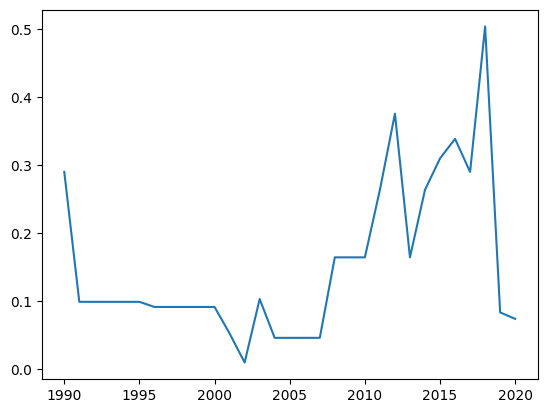

In [73]:

def plot_prob_series(country,start_year,end_year,lookback=5):
    
    sns.lineplot(x = list(range(start_year,end_year+1)),y=prob_series(country,start_year,end_year,lookback))
    
plot_prob_series('Libya',1990,2020)




In [111]:
codes = pd.read_csv('../raw_data/country_code_example.csv')


def lambda_prob(row):
    
    prob_value = get_prob(row['Country from our model'],2021)
    
    return prob_value

code_dict = pd.Series(codes['Country from our model'].values,index=codes.Code).to_dict()

# codes2 = codes[['Country from our model', 'Code']].dropna()

#codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
# codes2
# codes2['next_year_prob'] = get_prob(codes2['Country from our model'],2022)

codes2 = codes[['Country from our model', 'Code']].dropna()
codes2

,Country from our model,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG
...,...,...
170,Venezuela,VEN
171,Vietnam,VNM
172,Yemen,YEM
173,Zambia,ZMB


In [112]:
array_list = []

for i in list(range(1990,2023)):
    temp_array = []
    for country in codes2['Country from our model']:
        
        temp_array.append(get_prob(country, i))
    np.array(temp_array)
    array_list.append(temp_array)


# temp_list = np.array([get_prob('Afghanistan',2021), get_prob('Albania',2021),get_prob('Algeria',2021),get_prob('Angola',2021)
#                       , get_prob('Argentina',2021)])
                      
# temp['prob'] = temp_list


                      

trying Afghanistan year 1990
trying Albania year 1990
trying Algeria year 1990
trying Angola year 1990
trying Argentina year 1990
trying Armenia year 1990
trying Australia year 1990
trying Austria year 1990
trying Azerbaijan year 1990
trying Bahamas year 1990
trying Bahrain year 1990
trying Bangladesh year 1990
trying Barbados year 1990
trying Belarus year 1990
trying Belgium year 1990
trying Benin year 1990
trying Bermuda year 1990
trying Bolivia year 1990
trying Bosnia and Herzegovina year 1990
trying Botswana year 1990
trying Brazil year 1990
trying Bulgaria year 1990
trying Burkina Faso year 1990
trying Burma (Myanmar) year 1990
trying Burundi year 1990
trying Cambodia year 1990
trying Cameroon year 1990
trying Canada year 1990
trying Central African Republic year 1990
trying Chad year 1990
trying Chile year 1990
trying China year 1990
trying Colombia year 1990
trying Costa Rica year 1990
trying Croatia year 1990
trying Cuba year 1990
trying Cyprus year 1990
trying Czechia year 199

trying Tunisia year 1991
trying Turkey year 1991
trying Turkmenistan year 1991
trying Uganda year 1991
trying Ukraine year 1991
trying United Arab Emirates year 1991
trying United Kingdom year 1991
trying Uruguay year 1991
trying USA year 1991
trying Uzbekistan year 1991
trying Venezuela year 1991
trying Vietnam year 1991
trying Yemen year 1991
trying Zambia year 1991
trying Zimbabwe year 1991
trying Afghanistan year 1992
trying Albania year 1992
trying Algeria year 1992
trying Angola year 1992
trying Argentina year 1992
trying Armenia year 1992
trying Australia year 1992
trying Austria year 1992
trying Azerbaijan year 1992
trying Bahamas year 1992
trying Bahrain year 1992
trying Bangladesh year 1992
trying Barbados year 1992
trying Belarus year 1992
trying Belgium year 1992
trying Benin year 1992
trying Bermuda year 1992
trying Bolivia year 1992
trying Bosnia and Herzegovina year 1992
trying Botswana year 1992
trying Brazil year 1992
trying Bulgaria year 1992
trying Burkina Faso year 

trying Rwanda year 1993
trying Saint Lucia year 1993
trying Samoa year 1993
trying Saudi Arabia year 1993
trying Senegal year 1993
trying Serbia year 1993
trying Seychelles year 1993
trying Sierra Leone year 1993
trying Singapore year 1993
trying Slovakia year 1993
trying Slovenia year 1993
trying Somalia year 1993
trying South Africa year 1993
trying South Korea year 1993
trying Spain year 1993
trying Sri Lanka year 1993
trying Sudan year 1993
trying Suriname year 1993
trying Swaziland year 1993
trying Sweden year 1993
trying Switzerland year 1993
trying Syria year 1993
trying Tajikistan year 1993
trying Tanzania year 1993
trying Thailand year 1993
trying Togo year 1993
trying Tonga year 1993
trying Trinidad and Tobago year 1993
trying Tunisia year 1993
trying Turkey year 1993
trying Turkmenistan year 1993
trying Uganda year 1993
trying Ukraine year 1993
trying United Arab Emirates year 1993
trying United Kingdom year 1993
trying Uruguay year 1993
trying USA year 1993
trying Uzbekista

trying Nepal year 1995
trying Netherlands year 1995
trying New Zealand year 1995
trying Nicaragua year 1995
trying Niger year 1995
trying Nigeria year 1995
trying North Korea year 1995
trying North Macedonia year 1995
trying Norway year 1995
trying Oman year 1995
trying Pakistan year 1995
trying Palestine year 1995
trying Panama year 1995
trying Papua New Guinea year 1995
trying Paraguay year 1995
trying Peru year 1995
trying Philippines year 1995
trying Poland year 1995
trying Portugal year 1995
trying Puerto Rico year 1995
trying Qatar year 1995
trying Republic of the Congo year 1995
trying Romania year 1995
trying Russia year 1995
trying Rwanda year 1995
trying Saint Lucia year 1995
trying Samoa year 1995
trying Saudi Arabia year 1995
trying Senegal year 1995
trying Serbia year 1995
trying Seychelles year 1995
trying Sierra Leone year 1995
trying Singapore year 1995
trying Slovakia year 1995
trying Slovenia year 1995
trying Somalia year 1995
trying South Africa year 1995
trying Sout

trying Laos year 1997
trying Latvia year 1997
trying Lebanon year 1997
trying Lesotho year 1997
trying Liberia year 1997
trying Libya year 1997
trying Liechtenstein year 1997
trying Lithuania year 1997
trying Luxembourg year 1997
trying Madagascar year 1997
trying Malawi year 1997
trying Malaysia year 1997
trying Maldives year 1997
trying Mali year 1997
trying Malta year 1997
trying Mauritania year 1997
trying Mauritius year 1997
trying Mexico year 1997
trying Moldova year 1997
trying Monaco year 1997
trying Mongolia year 1997
trying Montenegro year 1997
trying Morocco year 1997
trying Mozambique year 1997
trying Namibia year 1997
trying Nepal year 1997
trying Netherlands year 1997
trying New Zealand year 1997
trying Nicaragua year 1997
trying Niger year 1997
trying Nigeria year 1997
trying North Korea year 1997
trying North Macedonia year 1997
trying Norway year 1997
trying Oman year 1997
trying Pakistan year 1997
trying Palestine year 1997
trying Panama year 1997
trying Papua New Gui

trying Haiti year 1999
trying Honduras year 1999
trying Hong Kong year 1999
trying Hungary year 1999
trying Iceland year 1999
trying India year 1999
trying Indonesia year 1999
trying Iran year 1999
trying Iraq year 1999
trying Ireland year 1999
trying Israel year 1999
trying Italy year 1999
trying Ivory Coast year 1999
trying Jamaica year 1999
trying Japan year 1999
trying Jordan year 1999
trying Kazakhstan year 1999
trying Kenya year 1999
trying Kuwait year 1999
trying Kyrgyzstan year 1999
trying Laos year 1999
trying Latvia year 1999
trying Lebanon year 1999
trying Lesotho year 1999
trying Liberia year 1999
trying Libya year 1999
trying Liechtenstein year 1999
trying Lithuania year 1999
trying Luxembourg year 1999
trying Madagascar year 1999
trying Malawi year 1999
trying Malaysia year 1999
trying Maldives year 1999
trying Mali year 1999
trying Malta year 1999
trying Mauritania year 1999
trying Mauritius year 1999
trying Mexico year 1999
trying Moldova year 1999
trying Monaco year 19

trying Gambia year 2001
trying Georgia year 2001
trying Germany year 2001
trying Ghana year 2001
trying Greece year 2001
trying Grenada year 2001
trying Guatemala year 2001
trying Guinea year 2001
trying Guinea-Bissau year 2001
trying Guyana year 2001
trying Haiti year 2001
trying Honduras year 2001
trying Hong Kong year 2001
trying Hungary year 2001
trying Iceland year 2001
trying India year 2001
trying Indonesia year 2001
trying Iran year 2001
trying Iraq year 2001
trying Ireland year 2001
trying Israel year 2001
trying Italy year 2001
trying Ivory Coast year 2001
trying Jamaica year 2001
trying Japan year 2001
trying Jordan year 2001
trying Kazakhstan year 2001
trying Kenya year 2001
trying Kuwait year 2001
trying Kyrgyzstan year 2001
trying Laos year 2001
trying Latvia year 2001
trying Lebanon year 2001
trying Lesotho year 2001
trying Liberia year 2001
trying Libya year 2001
trying Liechtenstein year 2001
trying Lithuania year 2001
trying Luxembourg year 2001
trying Madagascar year

trying Chad year 2003
trying Chile year 2003
trying China year 2003
trying Colombia year 2003
trying Costa Rica year 2003
trying Croatia year 2003
trying Cuba year 2003
trying Cyprus year 2003
trying Czechia year 2003
trying Democratic Republic of the Congo year 2003
trying Denmark year 2003
trying Djibouti year 2003
trying Dominican Republic year 2003
trying Ecuador year 2003
trying Egypt year 2003
trying El Salvador year 2003
trying Equatorial Guinea year 2003
trying Eritrea year 2003
trying Estonia year 2003
trying Ethiopia year 2003
trying Fiji year 2003
trying Finland year 2003
trying France year 2003
trying Gabon year 2003
trying Gambia year 2003
trying Georgia year 2003
trying Germany year 2003
trying Ghana year 2003
trying Greece year 2003
trying Grenada year 2003
trying Guatemala year 2003
trying Guinea year 2003
trying Guinea-Bissau year 2003
trying Guyana year 2003
trying Haiti year 2003
trying Honduras year 2003
trying Hong Kong year 2003
trying Hungary year 2003
trying Ice

trying Bahrain year 2005
trying Bangladesh year 2005
trying Barbados year 2005
trying Belarus year 2005
trying Belgium year 2005
trying Benin year 2005
trying Bermuda year 2005
trying Bolivia year 2005
trying Bosnia and Herzegovina year 2005
trying Botswana year 2005
trying Brazil year 2005
trying Bulgaria year 2005
trying Burkina Faso year 2005
trying Burma (Myanmar) year 2005
trying Burundi year 2005
trying Cambodia year 2005
trying Cameroon year 2005
trying Canada year 2005
trying Central African Republic year 2005
trying Chad year 2005
trying Chile year 2005
trying China year 2005
trying Colombia year 2005
trying Costa Rica year 2005
trying Croatia year 2005
trying Cuba year 2005
trying Cyprus year 2005
trying Czechia year 2005
trying Democratic Republic of the Congo year 2005
trying Denmark year 2005
trying Djibouti year 2005
trying Dominican Republic year 2005
trying Ecuador year 2005
trying Egypt year 2005
trying El Salvador year 2005
trying Equatorial Guinea year 2005
trying Er

trying Vietnam year 2006
trying Yemen year 2006
trying Zambia year 2006
trying Zimbabwe year 2006
trying Afghanistan year 2007
trying Albania year 2007
trying Algeria year 2007
trying Angola year 2007
trying Argentina year 2007
trying Armenia year 2007
trying Australia year 2007
trying Austria year 2007
trying Azerbaijan year 2007
trying Bahamas year 2007
trying Bahrain year 2007
trying Bangladesh year 2007
trying Barbados year 2007
trying Belarus year 2007
trying Belgium year 2007
trying Benin year 2007
trying Bermuda year 2007
trying Bolivia year 2007
trying Bosnia and Herzegovina year 2007
trying Botswana year 2007
trying Brazil year 2007
trying Bulgaria year 2007
trying Burkina Faso year 2007
trying Burma (Myanmar) year 2007
trying Burundi year 2007
trying Cambodia year 2007
trying Cameroon year 2007
trying Canada year 2007
trying Central African Republic year 2007
trying Chad year 2007
trying Chile year 2007
trying China year 2007
trying Colombia year 2007
trying Costa Rica year 2

trying Trinidad and Tobago year 2008
trying Tunisia year 2008
trying Turkey year 2008
trying Turkmenistan year 2008
trying Uganda year 2008
trying Ukraine year 2008
trying United Arab Emirates year 2008
trying United Kingdom year 2008
trying Uruguay year 2008
trying USA year 2008
trying Uzbekistan year 2008
trying Venezuela year 2008
trying Vietnam year 2008
trying Yemen year 2008
trying Zambia year 2008
trying Zimbabwe year 2008
trying Afghanistan year 2009
trying Albania year 2009
trying Algeria year 2009
trying Angola year 2009
trying Argentina year 2009
trying Armenia year 2009
trying Australia year 2009
trying Austria year 2009
trying Azerbaijan year 2009
trying Bahamas year 2009
trying Bahrain year 2009
trying Bangladesh year 2009
trying Barbados year 2009
trying Belarus year 2009
trying Belgium year 2009
trying Benin year 2009
trying Bermuda year 2009
trying Bolivia year 2009
trying Bosnia and Herzegovina year 2009
trying Botswana year 2009
trying Brazil year 2009
trying Bulgari

trying Trinidad and Tobago year 2010
trying Tunisia year 2010
trying Turkey year 2010
trying Turkmenistan year 2010
trying Uganda year 2010
trying Ukraine year 2010
trying United Arab Emirates year 2010
trying United Kingdom year 2010
trying Uruguay year 2010
trying USA year 2010
trying Uzbekistan year 2010
trying Venezuela year 2010
trying Vietnam year 2010
trying Yemen year 2010
trying Zambia year 2010
trying Zimbabwe year 2010
trying Afghanistan year 2011
trying Albania year 2011
trying Algeria year 2011
trying Angola year 2011
trying Argentina year 2011
trying Armenia year 2011
trying Australia year 2011
trying Austria year 2011
trying Azerbaijan year 2011
trying Bahamas year 2011
trying Bahrain year 2011
trying Bangladesh year 2011
trying Barbados year 2011
trying Belarus year 2011
trying Belgium year 2011
trying Benin year 2011
trying Bermuda year 2011
trying Bolivia year 2011
trying Bosnia and Herzegovina year 2011
trying Botswana year 2011
trying Brazil year 2011
trying Bulgari

trying Paraguay year 2012
trying Peru year 2012
trying Philippines year 2012
trying Poland year 2012
trying Portugal year 2012
trying Puerto Rico year 2012
trying Qatar year 2012
trying Republic of the Congo year 2012
trying Romania year 2012
trying Russia year 2012
trying Rwanda year 2012
trying Saint Lucia year 2012
trying Samoa year 2012
trying Saudi Arabia year 2012
trying Senegal year 2012
trying Serbia year 2012
trying Seychelles year 2012
trying Sierra Leone year 2012
trying Singapore year 2012
trying Slovakia year 2012
trying Slovenia year 2012
trying Somalia year 2012
trying South Africa year 2012
trying South Korea year 2012
trying Spain year 2012
trying Sri Lanka year 2012
trying Sudan year 2012
trying Suriname year 2012
trying Swaziland year 2012
trying Sweden year 2012
trying Switzerland year 2012
trying Syria year 2012
trying Tajikistan year 2012
trying Tanzania year 2012
trying Thailand year 2012
trying Togo year 2012
trying Tonga year 2012
trying Trinidad and Tobago yea

trying Luxembourg year 2014
trying Madagascar year 2014
trying Malawi year 2014
trying Malaysia year 2014
trying Maldives year 2014
trying Mali year 2014
trying Malta year 2014
trying Mauritania year 2014
trying Mauritius year 2014
trying Mexico year 2014
trying Moldova year 2014
trying Monaco year 2014
trying Mongolia year 2014
trying Montenegro year 2014
trying Morocco year 2014
trying Mozambique year 2014
trying Namibia year 2014
trying Nepal year 2014
trying Netherlands year 2014
trying New Zealand year 2014
trying Nicaragua year 2014
trying Niger year 2014
trying Nigeria year 2014
trying North Korea year 2014
trying North Macedonia year 2014
trying Norway year 2014
trying Oman year 2014
trying Pakistan year 2014
trying Palestine year 2014
trying Panama year 2014
trying Papua New Guinea year 2014
trying Paraguay year 2014
trying Peru year 2014
trying Philippines year 2014
trying Poland year 2014
trying Portugal year 2014
trying Puerto Rico year 2014
trying Qatar year 2014
trying Re

trying Malta year 2016
trying Mauritania year 2016
trying Mauritius year 2016
trying Mexico year 2016
trying Moldova year 2016
trying Monaco year 2016
trying Mongolia year 2016
trying Montenegro year 2016
trying Morocco year 2016
trying Mozambique year 2016
trying Namibia year 2016
trying Nepal year 2016
trying Netherlands year 2016
trying New Zealand year 2016
trying Nicaragua year 2016
trying Niger year 2016
trying Nigeria year 2016
trying North Korea year 2016
trying North Macedonia year 2016
trying Norway year 2016
trying Oman year 2016
trying Pakistan year 2016
trying Palestine year 2016
trying Panama year 2016
trying Papua New Guinea year 2016
trying Paraguay year 2016
trying Peru year 2016
trying Philippines year 2016
trying Poland year 2016
trying Portugal year 2016
trying Puerto Rico year 2016
trying Qatar year 2016
trying Republic of the Congo year 2016
trying Romania year 2016
trying Russia year 2016
trying Rwanda year 2016
trying Saint Lucia year 2016
trying Samoa year 2016

trying Haiti year 2018
trying Honduras year 2018
trying Hong Kong year 2018
trying Hungary year 2018
trying Iceland year 2018
trying India year 2018
trying Indonesia year 2018
trying Iran year 2018
trying Iraq year 2018
trying Ireland year 2018
trying Israel year 2018
trying Italy year 2018
trying Ivory Coast year 2018
trying Jamaica year 2018
trying Japan year 2018
trying Jordan year 2018
trying Kazakhstan year 2018
trying Kenya year 2018
trying Kuwait year 2018
trying Kyrgyzstan year 2018
trying Laos year 2018
trying Latvia year 2018
trying Lebanon year 2018
trying Lesotho year 2018
trying Liberia year 2018
trying Libya year 2018
trying Liechtenstein year 2018
trying Lithuania year 2018
trying Luxembourg year 2018
trying Madagascar year 2018
trying Malawi year 2018
trying Malaysia year 2018
trying Maldives year 2018
trying Mali year 2018
trying Malta year 2018
trying Mauritania year 2018
trying Mauritius year 2018
trying Mexico year 2018
trying Moldova year 2018
trying Monaco year 20

trying Chile year 2020
trying China year 2020
trying Colombia year 2020
trying Costa Rica year 2020
trying Croatia year 2020
trying Cuba year 2020
trying Cyprus year 2020
trying Czechia year 2020
trying Democratic Republic of the Congo year 2020
trying Denmark year 2020
trying Djibouti year 2020
trying Dominican Republic year 2020
trying Ecuador year 2020
trying Egypt year 2020
trying El Salvador year 2020
trying Equatorial Guinea year 2020
trying Eritrea year 2020
trying Estonia year 2020
trying Ethiopia year 2020
trying Fiji year 2020
trying Finland year 2020
trying France year 2020
trying Gabon year 2020
trying Gambia year 2020
trying Georgia year 2020
trying Germany year 2020
trying Ghana year 2020
trying Greece year 2020
trying Grenada year 2020
trying Guatemala year 2020
trying Guinea year 2020
trying Guinea-Bissau year 2020
trying Guyana year 2020
trying Haiti year 2020
trying Honduras year 2020
trying Hong Kong year 2020
trying Hungary year 2020
trying Iceland year 2020
trying 

trying Brazil year 2022
trying Bulgaria year 2022
trying Burkina Faso year 2022
trying Burma (Myanmar) year 2022
trying Burundi year 2022
trying Cambodia year 2022
trying Cameroon year 2022
trying Canada year 2022
trying Central African Republic year 2022
trying Chad year 2022
trying Chile year 2022
trying China year 2022
trying Colombia year 2022
trying Costa Rica year 2022
trying Croatia year 2022
trying Cuba year 2022
trying Cyprus year 2022
trying Czechia year 2022
trying Democratic Republic of the Congo year 2022
trying Denmark year 2022
trying Djibouti year 2022
trying Dominican Republic year 2022
trying Ecuador year 2022
trying Egypt year 2022
trying El Salvador year 2022
trying Equatorial Guinea year 2022
trying Eritrea year 2022
trying Estonia year 2022
trying Ethiopia year 2022
trying Fiji year 2022
trying Finland year 2022
trying France year 2022
trying Gabon year 2022
trying Gambia year 2022
trying Georgia year 2022
trying Germany year 2022
trying Ghana year 2022
trying Gre

In [134]:
year_prob_list = []

for array in array_list:
    codes2['prob'] = array
    year_prob_list.append(codes2)
    
year_prob_list[8]

,Country from our model,Code,prob
0,Afghanistan,AFG,0.420056
1,Albania,ALB,0.388657
2,Algeria,DZA,0.503767
3,Angola,AGO,0.319246
4,Argentina,ARG,0.269771
...,...,...,...
170,Venezuela,VEN,0.375800
171,Vietnam,VNM,0.420056
172,Yemen,YEM,0.046014
173,Zambia,ZMB,0.289925


In [ ]:
time_series_probs = []



# for i in list(range(1990,2023)):
#     def lambda_prob(row):
    
#         prob_value = get_prob(row['Country from our model'],i)
    
#         return prob_value
    
#     codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
#     time_series_probs.append(codes2)
#     codes2.drop(columns='prob')

# def get_year_probs(year):
#     def lambda_prob(row):
    
#         prob_value = get_prob(row['Country from our model'],year)
    
#         return prob_value
#     codes3 = codes[['Country from our model', 'Code']].dropna()
    
#     codes3['prob'] = codes3.apply(lambda x: lambda_prob(x),axis=1)
#     return codes3




# Downloading the data

In [ ]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)